<a href="https://colab.research.google.com/github/ketanp23/sit-neuralnetworks-class/blob/main/Learning_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trains on increasing amounts of data, plots training and validation MSE. A good model shows both curves dropping and converging.

Scenario: Predict house prices based on size (square feet). We use a simple neural network (linear regression) and plot learning curves.



Data: Fake dataset of house sizes (input) and prices (output) with some noise.



Goal: Minimize mean squared error (MSE) and watch how training/validation losses behave.



Expectation: Training loss drops steadily. Validation loss should follow if the model generalizes well.

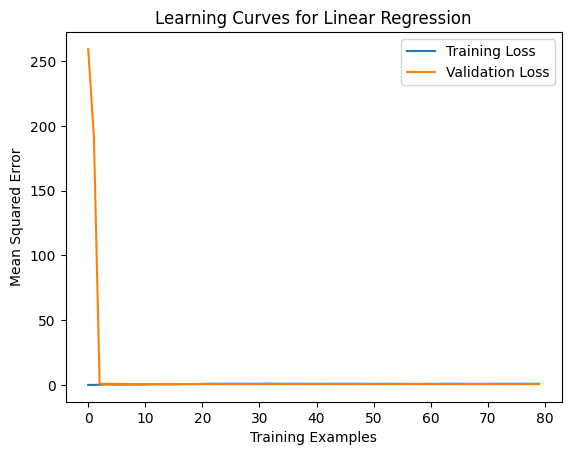

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # House sizes
y = 3 * X.squeeze() + 2 + np.random.normal(0, 1, 100)  # Prices with noise

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()
train_losses, val_losses = [], []

# Train incrementally and record losses
for i in range(1, len(X_train) + 1):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    val_pred = model.predict(X_val)
    train_losses.append(mean_squared_error(y_train[:i], train_pred))
    val_losses.append(mean_squared_error(y_val, val_pred))

# Plot learning curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Learning Curves for Linear Regression')
plt.show()